In [1]:
%pip install --quiet --upgrade diffusers transformers scipy mediapy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
from diffusers import PNDMScheduler, DDIMScheduler, LMSDiscreteScheduler

scheduler = PNDMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", skip_prk_steps=True)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
import mediapy as media
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"
remove_safety = False


pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16, revision="fp16", use_auth_token="Your Huggingface auth token")
if remove_safety:
  pipe.safety_checker = lambda images, clip_input: (images, False)
pipe = pipe.to(device)

model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_utils.py:267: FutureWarning: You are loading the variant fp16 from CompVis/stable-diffusion-v1-4 via `revision='fp16'`. This behavior is deprecated and will be removed in diffusers v1. One should use `variant='fp16'` instead. However, it appears that CompVis/stable-diffusion-v1-4 currently does not have the required variant filenames in the 'main' branch. 
 The Diffusers team and community would be very grateful if you could open an issue: https://github.com/huggingface/diffusers/issues/new with the title 'CompVis/stable-diffusion-v1-4 is missing fp16 files' so that the correct variant file can be added.
  warnings.warn(
text_encoder/model.safetensors not found


Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:132: FutureWarning: The configuration file of this scheduler: PNDMScheduler {
  "_class_name": "PNDMScheduler",
  "_diffusers_version": "0.23.1",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_st

  0%|          | 0/50 [00:00<?, ?it/s]

""

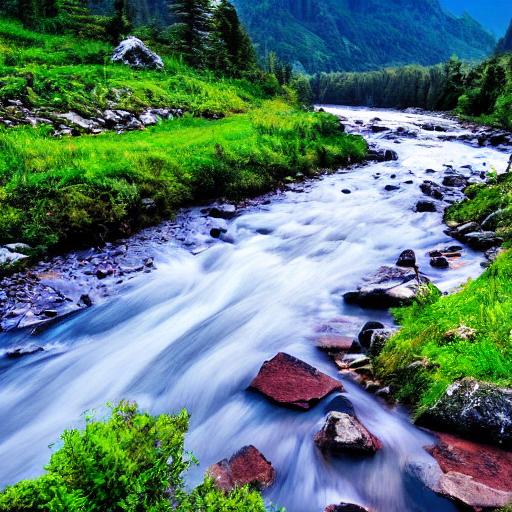

In [4]:
prompt = "beautiful scenery of the mountains with a river"
num_images = 1

prompts = [ prompt ] * num_images
with autocast("cuda"):
    images = pipe(prompts, guidance_scale=7.5, num_inference_steps=50).images

media.show_images(images)
images[0].save("output.jpg")

  0%|          | 0/50 [00:00<?, ?it/s]

""

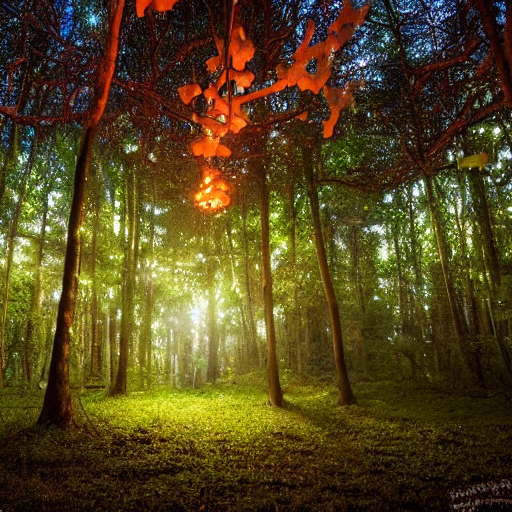

In [5]:
prompt = "Enchanting forest at dusk with a canopy of bioluminescent mushrooms."
num_images = 1

prompts = [ prompt ] * num_images
with autocast("cuda"):
    images = pipe(prompts, guidance_scale=7.5, num_inference_steps=50).images

media.show_images(images)
images[0].save("output1.jpg")

  0%|          | 0/50 [00:00<?, ?it/s]

""

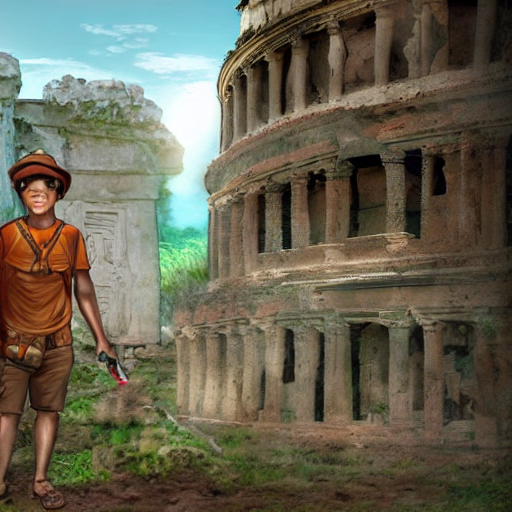

In [8]:
prompt = "Time-traveling explorer surrounded by ancient ruins and mysterious artifacts."
num_images = 1

prompts = [ prompt ] * num_images
with autocast("cuda"):
    images = pipe(prompts, guidance_scale=7.5, num_inference_steps=50).images

media.show_images(images)
images[0].save("output2.jpg")

[Code explanation and architecture behind it](https://chat.openai.com/share/5ce4dd54-1425-470d-a00d-c762d59339ce)